In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
income_by_age = pd.read_csv('clean_data/loan_data.csv')
income_by_age.head()

,Unnamed: 0,age,median_income,mean_income,2004LB,2005LB,2006LB,2007LB,2008LB,2009LB,2010LB,2011LB,2012LB,2013LB,2014LB,age_group
0,0,18,5000.0,8419.92,146.0,161.0,194.0,217.0,248.0,273.0,299.0,312.0,320.0,356.0,369.0,18.0
1,1,19,10000.0,13484.63,146.0,161.0,194.0,217.0,248.0,273.0,299.0,312.0,320.0,356.0,369.0,18.0
2,2,20,14438.0,17456.99,146.0,161.0,194.0,217.0,248.0,273.0,299.0,312.0,320.0,356.0,369.0,18.0
3,3,21,18000.0,21927.80,146.0,161.0,194.0,217.0,248.0,273.0,299.0,312.0,320.0,356.0,369.0,18.0
4,4,22,18501.0,23680.10,146.0,161.0,194.0,217.0,248.0,273.0,299.0,312.0,320.0,356.0,369.0,18.0


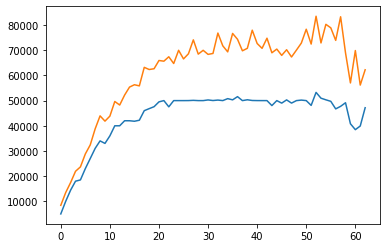

In [3]:
_ = plt.plot(income_by_age[['median_income', 'mean_income']])
plt.show()

In [4]:
borrowers = pd.read_csv('clean_data/borrowers_2014.csv')
borrowers.head()

,Unnamed: 0,NumberOfBorrowers,minBal,maxBal,percentage
0,0,9028800,NaN,5000.0,0.208310
1,1,7785500,5001.0,10000.0,0.179625
2,2,12348000,10001.0,25000.0,0.284890
3,3,7997000,25001.0,50000.0,0.184505
4,4,3126800,50001.0,75000.0,0.072141


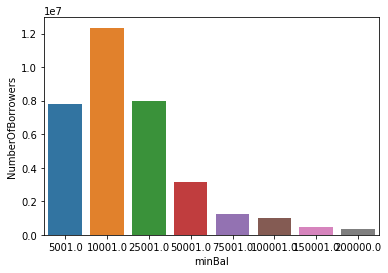

In [5]:
_ = sns.barplot(y='NumberOfBorrowers', x='minBal', data=borrowers)
plt.show()

In [6]:
ocup_data = pd.read_csv('clean_data/ocup_data.csv')
ocup_data.head()

,ocupation,gender,2010,2011,2012,2013,2014,2015,2016,2017,income_type
0,Accommodation and food services,Female,20867,21190,21276,21737,21932,22392,23076,24328,Median earnings (dollars)
1,Accommodation and food services,Male,25350,25388,25572,25900,26422,26785,28026,29530,Median earnings (dollars)
2,Administrative and support and waste managemen...,Female,29972,30211,30359,30407,30402,30626,31279,31870,Median earnings (dollars)
3,Administrative and support and waste managemen...,Male,32226,32121,32376,32144,32417,33653,34709,36582,Median earnings (dollars)
4,"Agriculture, forestry, fishing and hunting",Female,24020,24889,23657,23017,23854,25302,25860,26551,Median earnings (dollars)


In [7]:
ocup_data = ocup_data.set_index(['ocupation', 'gender'])
ocup_data.head()


2010   2011  \
ocupation                                          gender                 
Accommodation and food services                    Female  20867  21190   
                                                   Male    25350  25388   
Administrative and support and waste management... Female  29972  30211   
                                                   Male    32226  32121   
Agriculture, forestry, fishing and hunting         Female  24020  24889   

                                                            2012   2013  \
ocupation                                          gender                 
Accommodation and food services                    Female  21276  21737   
                                                   Male    25572  25900   
Administrative and support and waste management... Female  30359  30407   
                                                   Male    32376  32144   
Agriculture, forestry, fishing and hunting         Female  23657  23017   

                                                            2014   2015  \
ocupation                                          gender                 
Accommodation and food services                    Female  21932  22392   
                                                   Male    26422  26785   
Administrative and support and waste management... Female  30402  30626   
                                                   Male    32417  33653   
Agriculture, forestry, fishing and hunting         Female  23854  25302   

                                                            2016   2017  \
ocupation                                          gender                 
Accommodation and food services                    Female  23076  24328   
                                                   Male    28026  29530   
Administrative and support and waste management... Female  31279  31870   
                                                   Male    34709  36582   
Agriculture, forestry, fishing and hunting         Female  25860  26551   

                                                                         income_type  
ocupation                                          gender                             
Accommodation and food services                    Female  Median earnings (dollars)  
                                                   Male    Median earnings (dollars)  
Administrative and support and waste management... Female  Median earnings (dollars)  
                                                   Male    Median earnings (dollars)  
Agriculture, forestry, fishing and hunting         Female  Median earnings (dollars)

In [8]:
data1 = ocup_data.unstack(level='gender')
data1.head()

2010          2011  \
gender                                             Female   Male Female   
ocupation                                                                 
Accommodation and food services                     20867  25350  21190   
Administrative and support and waste management...  29972  32226  30211   
Agriculture, forestry, fishing and hunting          24020  29978  24889   
Arts, entertainment, and recreation                 30912  36268  31576   
Construction                                        39486  41114  40412   

                                                            2012         \
gender                                               Male Female   Male   
ocupation                                                                 
Accommodation and food services                     25388  21276  25572   
Administrative and support and waste management...  32121  30359  32376   
Agriculture, forestry, fishing and hunting          30689  23657  31379   
Arts, entertainment, and recreation                 36854  31326  36889   
Construction                                        41363  40585  41465   

                                                     2013          2014  \
gender                                             Female   Male Female   
ocupation                                                                 
Accommodation and food services                     21737  25900  21932   
Administrative and support and waste management...  30407  32144  30402   
Agriculture, forestry, fishing and hunting          23017  31794  23854   
Arts, entertainment, and recreation                 31915  36882  32539   
Construction                                        39933  41432  40370   

                                                            2015         \
gender                                               Male Female   Male   
ocupation                                                                 
Accommodation and food services                     26422  22392  26785   
Administrative and support and waste management...  32417  30626  33653   
Agriculture, forestry, fishing and hunting          31774  25302  32393   
Arts, entertainment, and recreation                 38351  32996  38338   
Construction                                        41655  41415  41833   

                                                     2016          2017  \
gender                                             Female   Male Female   
ocupation                                                                 
Accommodation and food services                     23076  28026  24328   
Administrative and support and waste management...  31279  34709  31870   
Agriculture, forestry, fishing and hunting          25860  32458  26551   
Arts, entertainment, and recreation                 33709  40224  35555   
Construction                                        42011  43015  42932   

                                                           \
gender                                               Male   
ocupation                                                   
Accommodation and food services                     29530   
Administrative and support and waste management...  36582   
Agriculture, forestry, fishing and hunting          35303   
Arts, entertainment, and recreation                 40787   
Construction                                        45302   

                                                                  income_type  \
gender                                                                 Female   
ocupation                                                                       
Accommodation and food services                     Median earnings (dollars)   
Administrative and support and waste management...  Median earnings (dollars)   
Agriculture, forestry, fishing and hunting          Median earnings (dollars)   
Arts, entertainment, and recreation                 Median earnings (doll

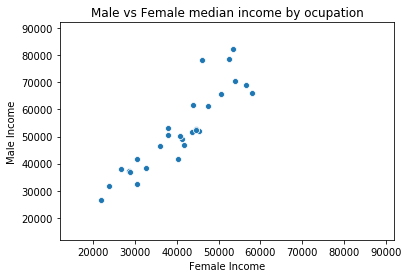

In [9]:
#scatter plot comparing male vs female income within individual ocupation categories
_ = sns.scatterplot(x=('2014', 'Female'), y=('2014', 'Male'), data=data1)

# identify limits of Domain and Range
min_income = min([min(data1[('2014', 'Female')]), min(data1[('2014', 'Male')])])
max_income = max([max(data1[('2014', 'Female')]), max(data1[('2014', 'Male')])])

# add padding
min_income -= 10000
max_income += 10000

# set axis
_ = plt.axis([min_income, max_income, min_income, max_income])

#
plt.title('Male vs Female median income by ocupation')
plt.xlabel('Female Income')
plt.ylabel('Male Income')

# show scatter plot
plt.show()

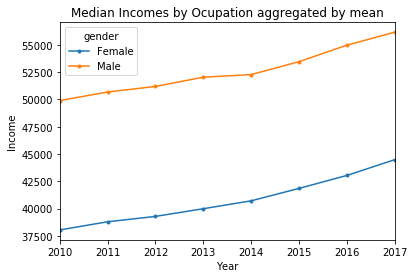

In [10]:
# Time series plot of median income by year 
col2 = list(ocup_data.columns)[:-1]
data2 = ocup_data[col2]

#group median incomes by ocupation and aggregate by mean
data2 = data2.groupby('gender').mean()
data2 = data2.transpose()

# create plot
_ = data2.plot(marker='.')

#set title and axis labels
plt.title('Median Incomes by Ocupation aggregated by mean')
plt.xlabel('Year')
plt.ylabel('Income')

#show plot
plt.show()


In [11]:
cost_living = pd.read_csv('clean_data/cost_of_living.csv')
cost_living.head()

,country,state,city,cost_of_living,rank_world
0,Albania,Albania,Tirana,37.25,424
1,Algeria,Algeria,Algiers,33.44,469
2,Argentina,Argentina,Buenos Aires,38.57,409
3,Armenia,Armenia,Yerevan,33.16,472
4,Australia,Australia,Adelaide,72.92,110


In [12]:
cost_living.sort_values('cost_of_living', ascending=False).head()
#_ = plt.hist(cost_living.cost_of_living)
#plt.show()

,country,state,city,cost_of_living,rank_world
26,Bermuda,Bermuda,Hamilton,137.56,1
363,Switzerland,Switzerland,Zurich,128.65,2
358,Switzerland,Switzerland,Basel,126.89,3
361,Switzerland,Switzerland,Lausanne,119.62,4
359,Switzerland,Switzerland,Bern,118.42,5


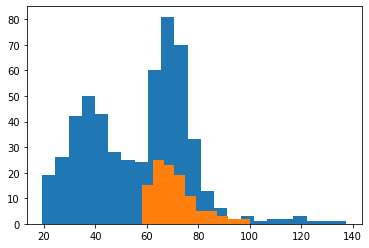

In [13]:
#cost of living index throughout the world highlighting the US.
data3 = cost_living.copy()
data3 = data3[cost_living.country == ' United States']
_ = plt.hist(cost_living.cost_of_living, bins=int(np.sqrt(cost_living.shape[0])))
_ = plt.hist(data3.cost_of_living, bins=int(np.sqrt(data3.shape[0])))
plt.show()

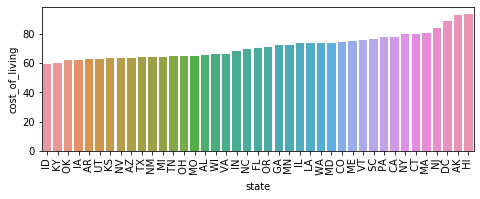

In [29]:
data4 = data3.sort_values('cost_of_living')
data4 = pd.DataFrame()
data4 = data3.groupby('state').mean()
data4 = data4.sort_values('cost_of_living')
data4['state'] =data4.index
data4.head()
plt.axes([0,0,1,0.5])
_ = sns.barplot(x='state', y='cost_of_living', data=data4)

plt.xticks(rotation=90)
